In [58]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/crimedataset/crime_rates.csv", on_bad_lines='skip')

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,place,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
df.shape

(1456714, 23)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'place', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
len(df)

1456714

In [8]:
df['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [9]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,329460
BATTERY,263700
CRIMINAL DAMAGE,155455
NARCOTICS,135240
ASSAULT,91289
OTHER OFFENSE,87874
BURGLARY,83397
DECEPTIVE PRACTICE,75495
MOTOR VEHICLE THEFT,61138


In [10]:
# data preprocessing
sampled_data = df.sample(n=5000, random_state=42)

In [11]:
sampled_data2 = df.sample(n=50000, random_state=42)

In [12]:
sampled_data3 = df.sample(n=20000, random_state=42)

In [13]:
sampled_data4 = df.sample(n=10000, random_state=42)

In [14]:
sampled_data4.head()

,Unnamed: 0,ID,Case Number,Date,place,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1312384,6091472,10593882,HZ345355,07/11/2016 10:06:00 PM,024XX W CORTLAND ST,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,True,...,1.0,22.0,18,1159769.0,1912550.0,2016,07/18/2016 03:55:46 PM,41.915753,-87.688450,"(41.915752584, -87.688449763)"
1153295,3489790,10295228,HY482823,10/30/2015 03:45:00 PM,030XX S PULASKI RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,...,22.0,30.0,26,1150193.0,1884098.0,2015,11/06/2015 03:55:21 PM,41.837869,-87.724373,"(41.837869311, -87.724373124)"
108568,2441069,8476417,HV143838,02/03/2012 12:20:00 PM,003XX E 47TH ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA GARAGE / OTHER PROPERTY,False,...,3.0,38.0,11,1179016.0,1873926.0,2012,02/04/2016 06:33:39 AM,41.809347,-87.618919,"(41.809347098, -87.618919216)"
1162005,3498527,10309264,HY498227,11/11/2015 08:00:00 PM,080XX S MARSHFIELD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,21.0,71.0,14,1166741.0,1851379.0,2015,11/18/2015 04:00:04 PM,41.747746,-87.664585,"(41.747746453, -87.664584768)"
533755,2868682,9156961,HW302436,06/03/2013 11:50:00 AM,003XX N LAVERGNE AVE,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,ALLEY,True,...,28.0,25.0,24,1142985.0,1901657.0,2013,02/04/2016 06:33:39 AM,41.886191,-87.750385,"(41.886190715, -87.750385437)"


In [15]:
len(sampled_data4)

10000

In [16]:
# saving in a new csv file
sampled_data4.to_csv('/content/drive/MyDrive/crimedataset/new_balanced_crime_dataset.csv',index=False)

In [17]:
df=pd.read_csv("/content/drive/MyDrive/crimedataset/new_balanced_crime_dataset.csv")

In [18]:
df.head()

,Unnamed: 0,ID,Case Number,Date,place,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6091472,10593882,HZ345355,07/11/2016 10:06:00 PM,024XX W CORTLAND ST,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,True,...,1.0,22.0,18,1159769.0,1912550.0,2016,07/18/2016 03:55:46 PM,41.915753,-87.688450,"(41.915752584, -87.688449763)"
1,3489790,10295228,HY482823,10/30/2015 03:45:00 PM,030XX S PULASKI RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,...,22.0,30.0,26,1150193.0,1884098.0,2015,11/06/2015 03:55:21 PM,41.837869,-87.724373,"(41.837869311, -87.724373124)"
2,2441069,8476417,HV143838,02/03/2012 12:20:00 PM,003XX E 47TH ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA GARAGE / OTHER PROPERTY,False,...,3.0,38.0,11,1179016.0,1873926.0,2012,02/04/2016 06:33:39 AM,41.809347,-87.618919,"(41.809347098, -87.618919216)"
3,3498527,10309264,HY498227,11/11/2015 08:00:00 PM,080XX S MARSHFIELD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,21.0,71.0,14,1166741.0,1851379.0,2015,11/18/2015 04:00:04 PM,41.747746,-87.664585,"(41.747746453, -87.664584768)"
4,2868682,9156961,HW302436,06/03/2013 11:50:00 AM,003XX N LAVERGNE AVE,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,ALLEY,True,...,28.0,25.0,24,1142985.0,1901657.0,2013,02/04/2016 06:33:39 AM,41.886191,-87.750385,"(41.886190715, -87.750385437)"


In [19]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,2237
BATTERY,1795
CRIMINAL DAMAGE,1098
NARCOTICS,890
OTHER OFFENSE,643
ASSAULT,603
BURGLARY,575
DECEPTIVE PRACTICE,508
MOTOR VEHICLE THEFT,453


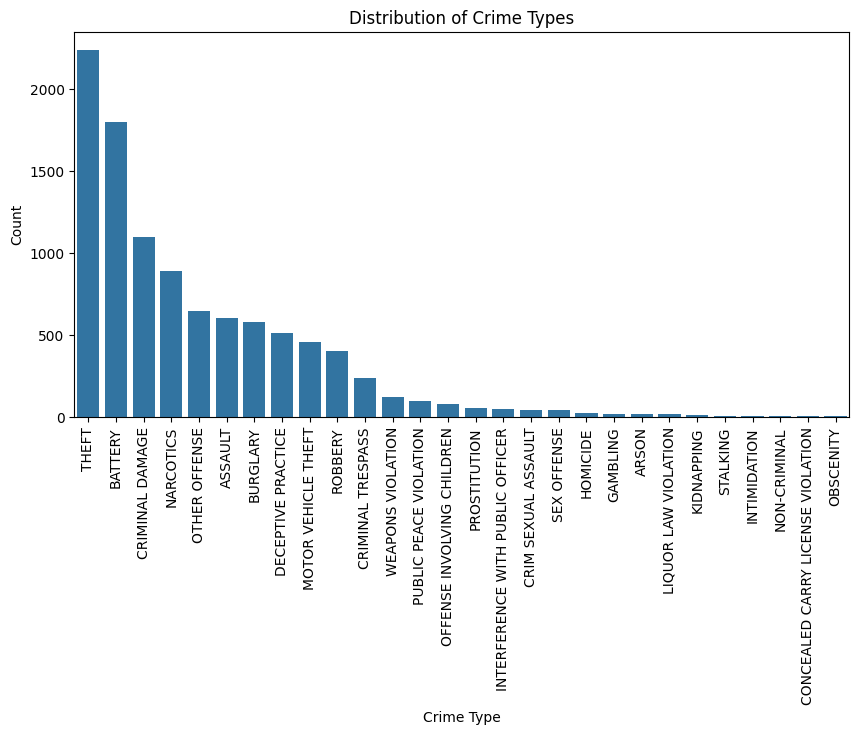

In [20]:
# plotting graph for crime type
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.countplot(x='Primary Type', data=df, order=df['Primary Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

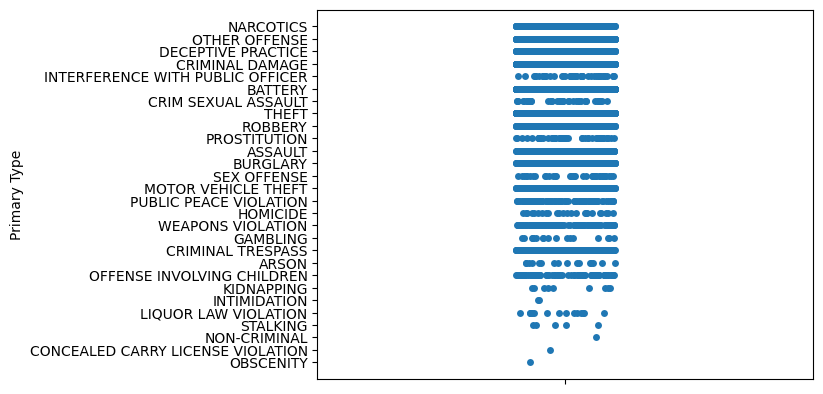

In [21]:
sns.stripplot(y=df['Primary Type']);

In [22]:
print('Number of Primary Types: ', df['Primary Type'].nunique())

df.info()

Number of Primary Types:  28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   ID                    10000 non-null  int64  
 2   Case Number           10000 non-null  object 
 3   Date                  10000 non-null  object 
 4   place                 10000 non-null  object 
 5   IUCR                  10000 non-null  object 
 6   Primary Type          10000 non-null  object 
 7   Description           10000 non-null  object 
 8   Location Description  9987 non-null   object 
 9   Arrest                10000 non-null  bool   
 10  Domestic              10000 non-null  bool   
 11  Beat                  10000 non-null  int64  
 12  District              10000 non-null  float64
 13  Ward                  10000 non-null  float64
 14  Community Area        10000 non-null  floa

In [23]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'Description',
                      'Location Description', 'Beat', 'Ward', 'FBI Code', 'Updated On',
                      'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'])

In [24]:
# checking for null
df.isnull().sum()

,0
Date,0
place,0
Primary Type,0
Arrest,0
Domestic,0
District,0
Community Area,0
Year,0


In [25]:
# getting datetime format from date column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df = df.drop(columns=['Date'])

<ipython-input-25-50199d0f0909>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [26]:
# Encode categorical variablesle = LabelEncoder()
le=LabelEncoder()
df['Primary Type'] = le.fit_transform(df['Primary Type'])
df['place'] = le.fit_transform(df['place'])
df['Arrest'] = le.fit_transform(df['Arrest'])
df['Domestic'] = le.fit_transform(df['Domestic'])

In [27]:
# Feature selection
X = df[['Year', 'Month', 'Primary Type', 'place', 'District', 'Community Area']]
y = df['Arrest']

In [28]:
# train-test slpit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# standardizing the data for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Model Training

# XGBoost Model
#xgb_model = XGBRegressor(random_state=42)

In [31]:
# Model Training
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

In [32]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [33]:
# Perform grid search

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

In [34]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [35]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 1.0}


In [36]:
# Train the best XGBoost model
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [37]:
# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [38]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [39]:
# Support Vector Machine (SVM) Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [40]:
# Model Evaluation

# function to calculate metrics
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mean_val = np.mean(y_pred)
    std_dev = np.std(y_pred)
    var_val = np.var(y_pred)
    return [mean_val, std_dev, var_val, rmse, mse, r2]

In [41]:
# Evaluating each model
metrics_xgb = get_metrics(y_test, y_pred_xgb)
metrics_knn = get_metrics(y_test, y_pred_knn)
metrics_dt = get_metrics(y_test, y_pred_dt)
metrics_svm = get_metrics(y_test, y_pred_svm)

In [42]:
# Dataframe to organize all the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean', 'Standard Deviation', 'Variance', 'RMSE', 'MSE', 'R²'],
    'XGBoost': metrics_xgb,
    'KNN': metrics_knn,
    'Decision Tree': metrics_dt,
    'SVM': metrics_svm
})

In [43]:
metrics_df

,Metric,XGBoost,KNN,Decision Tree,SVM
0,Mean,0.144333,0.245600,0.262000,0.148931
1,Standard Deviation,0.351427,0.244132,0.439723,0.165090
2,Variance,0.123501,0.059601,0.193356,0.027255
3,RMSE,0.373274,0.433113,0.472934,0.424563
4,MSE,0.139333,0.187587,0.223667,0.180254
5,R²,0.270319,0.017619,-0.171330,0.056021


In [44]:
metrics = ['Mean', 'Standard Deviation', 'Variance', 'RMSE', 'MSE', 'R²']
models = ['XGBoost', 'KNN', 'Decision Tree', 'SVM']

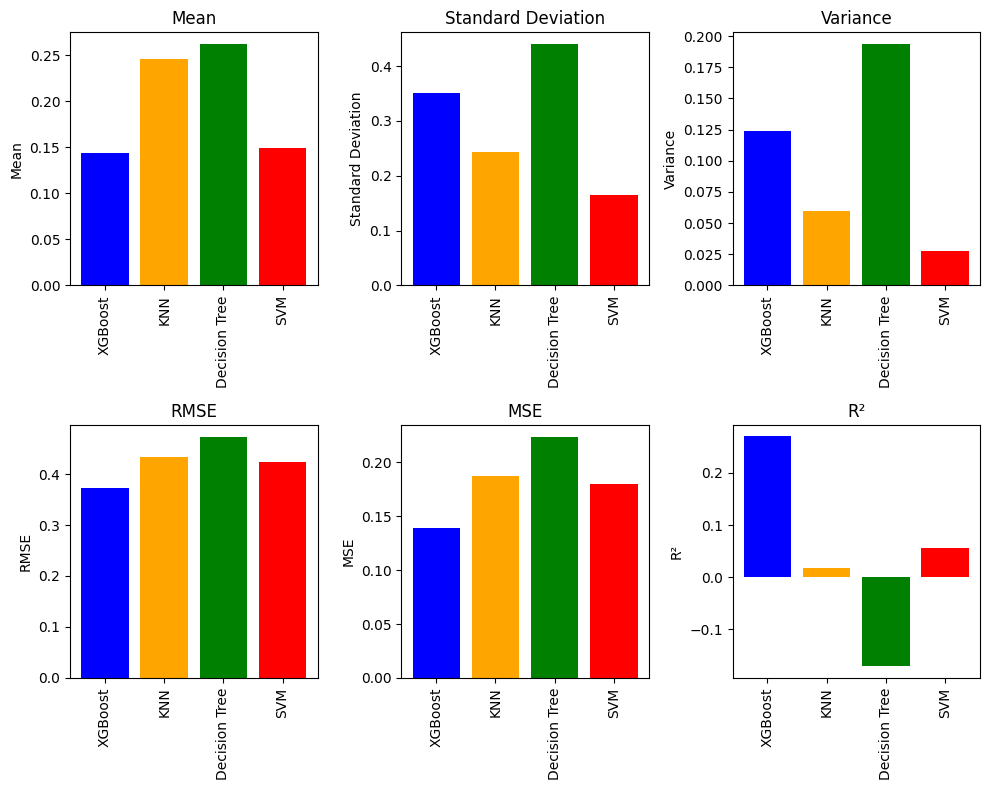

In [45]:
# model comparision graph
plt.figure(figsize=(10, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(models, metrics_df.loc[i, ['XGBoost', 'KNN', 'Decision Tree', 'SVM']], color=['blue', 'orange', 'green', 'red'])
    plt.xticks(rotation=90)
    plt.title(metric)
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

In [46]:
# Model comparision table
comparison_df = metrics_df.set_index('Metric').T
comparison_df

Metric,Mean,Standard Deviation,Variance,RMSE,MSE,R²
XGBoost,0.144333,0.351427,0.123501,0.373274,0.139333,0.270319
KNN,0.245600,0.244132,0.059601,0.433113,0.187587,0.017619
Decision Tree,0.262000,0.439723,0.193356,0.472934,0.223667,-0.171330
SVM,0.148931,0.165090,0.027255,0.424563,0.180254,0.056021


In [47]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8606666666666667
F1 Score: 0.6528239202657807


In [48]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
predictions.head()

,Actual,Predicted
6252,0,0
4684,0,0
1731,1,0
4742,1,1
4521,1,0


In [49]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.13933333333333334


In [50]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred_xgb)
print(f"R-squared Score: {r2}")

R-squared Score: 0.270318912530789


In [51]:
best_xgb.score(X_test,y_test)

0.8606666666666667

In [52]:
print(best_xgb.predict([[37, 20, 34, 2.9, 32, 3]]))
print(best_xgb.predict([[20, 25, 67, 69.6, 30, 21]]))
print(best_xgb.predict([[2, 10, 18, 26, 34, 42.8]]))
print(best_xgb.predict([[8, 100, 34.5, 26, 54, 45]]))
print(best_xgb.predict([[25.5, 34, 98, 10.1, 34, 56]]))

[1]
[1]
[0]
[1]
[1]


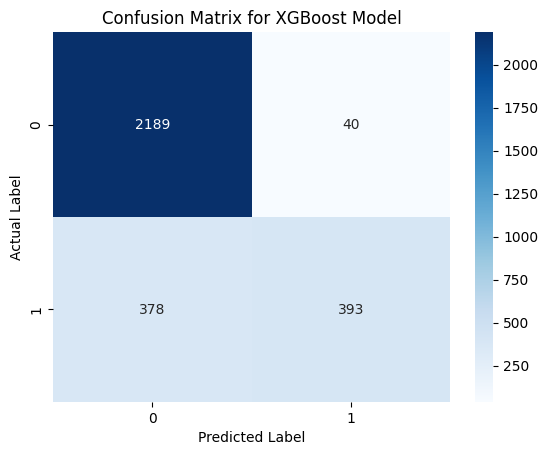

In [59]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

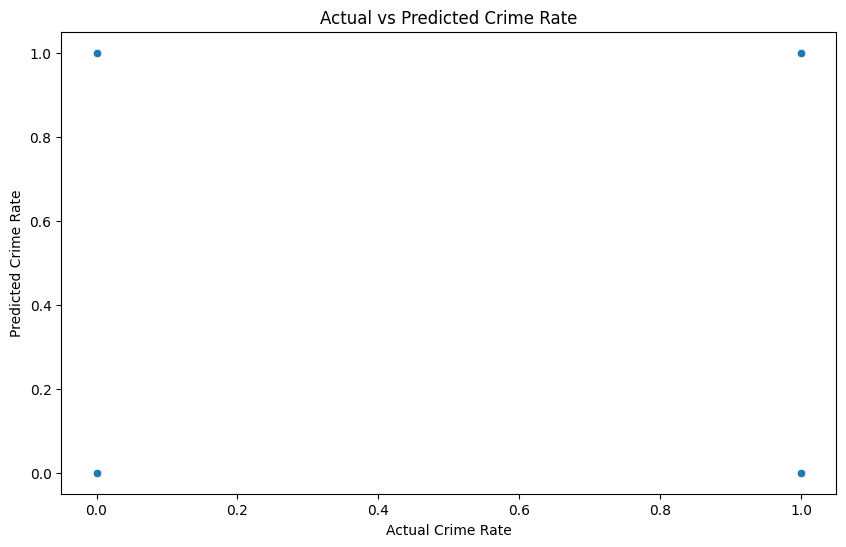

In [60]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted Crime Rate')
plt.show()

In [61]:
import pickle

# Save the model to a file
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)